# Lagged Cross Correlations

In [ ]:
#| default_exp lagged_ccorr

In [ ]:
#| hide

import plotly.io as pio

In [ ]:
#| hide
pio.renderers.default = "png"

In [ ]:
#| hide

from fhemb.piece import Piece
from fhemb.utils.factories import wfactory, pca_factory

In [ ]:
dg0 = Piece(title='Don Giovanni', time_interval=(14200,15200), subjs=[(65,68)])

 [DEBUG] piece.project: Choosen embeddings: [('features_ts', {'embedding': <fhemb.embedding.Embedding object>, 'features': ['skew']})]
 [DEBUG] mixins.wrapper: Calling create_wdecomposition with stacklevel=2
 [DEBUG] mixins.wrapper: Processing features ['skew'], heatmap None, fvector None, args=(), and kwargs={'factory': <fhemb.utils.factories.ConcreteEmbFactory object>}
 [DEBUG] mixins.wrapper: Feature keywords detected, no preprocessing needed.
 [DEBUG] mixins.wrapper: Validating feature: [6]
 [DEBUG] mixins.validate_grid: Vallidating grid: [6] and maxsize: 9
 [DEBUG] mixins.validate_grid: Vallidated grid: [6]
 [DEBUG] mixins.wrapper: valid_feature: [6]
 [DEBUG] mixins.wrapper: valid_features=[6]
 [DEBUG] embedding.create_wdecomposition: Calling create_wdecomposition for features=('skew',)
 [DEBUG] tutils.create: Creating create_wdecomposition with args: ('skew',) and kwargs: dict_keys(['factory', 'oembedding'])
 [DEBUG] tutils.create: Calculating create_wdecomposition for (('skew',)

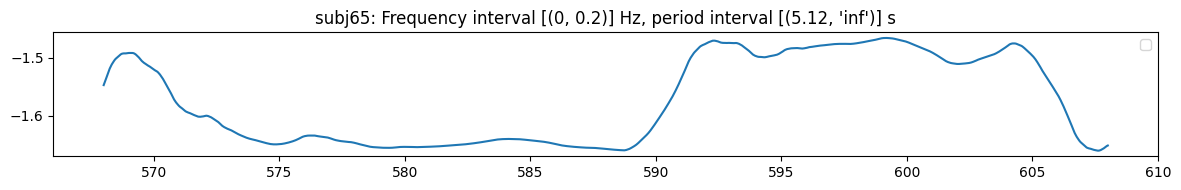

(<Figure size 1200x200 with 1 Axes>,
 [<Axes: title={'center': "subj65: Frequency interval [(0, 0.2)] Hz, period interval [(5.12, 'inf')] s"}>])

In [ ]:
#| eval: false

dg0.face_t.project(features=['skew'], subjs=[65], fbands=[0,1,2], wdfactory=wfactory('db4',8)).plot_signal(subjs=[65])

In [ ]:
#| hide

pca2 = pca_factory(
    name='standard_kpca_5_sigmoid_0.07', 
    scaler='Standard', 
    pca='Kernel',
    scaler_kwargs=dict(with_std=True), 
    pca_kwargs=dict(n_components=5, kernel='sigmoid', gamma=0.07, fit_inverse_transform=True)
)

In [ ]:

# Render lagged correlations as a static PNG so previewers that
# do not support Plotly's interactive mime type can still show it.
fig = dg0.face_t.project(
    subjs=[65],
    features=['kurtosis', 'skew'],
    fbands=[0,1,2,3],
    wdfactory=wfactory('db4',8),
    pcfactory=pca2,
).plot_lagged_correlations(
    twin=250,
    step=25,
    max_lag=250,
    n_jobs=8
)
from IPython.display import Image, display
# Try to render to PNG via Plotly's engine (requires kaleido).
try:
    img = fig.to_image(format='png', scale=2)
    display(Image(data=img))
except Exception:
    # Fallback: display interactive figure (may not render in some previews)
    display(fig)

 [DEBUG] piece.project: Choosen embeddings: [('features_ts', {'embedding': <fhemb.embedding.Embedding object>, 'features': ['kurtosis', 'skew']})]
 [DEBUG] mixins.wrapper: Calling create_wdecomposition with stacklevel=2
 [DEBUG] mixins.wrapper: Processing features ['kurtosis', 'skew'], heatmap None, fvector None, args=(), and kwargs={'factory': <fhemb.utils.factories.ConcreteEmbFactory object>}
 [DEBUG] mixins.wrapper: Feature keywords detected, no preprocessing needed.
 [DEBUG] mixins.wrapper: Validating feature: [7, 6]
 [DEBUG] mixins.validate_grid: Vallidating grid: [7, 6] and maxsize: 9
 [DEBUG] mixins.validate_grid: Vallidated grid: [7, 6]
 [DEBUG] mixins.wrapper: valid_feature: [6, 7]
 [DEBUG] mixins.wrapper: valid_features=[(6, 7)]
 [DEBUG] embedding.create_wdecomposition: Calling create_wdecomposition for features=('skew', 'kurtosis')
 [DEBUG] tutils.create: Creating create_wdecomposition with args: ('skew', 'kurtosis') and kwargs: dict_keys(['factory', 'oembedding'])
 [DEBUG] 

None

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()